In [ ]:
# Load the MNIST number dataset for digits 0 and 1. Display each digit as a 2d array
from sklearn.datasets import load_digits

x, y = load_digits(n_class=2, return_X_y=True)

print(x.shape, y.shape)

for digit in x:
    print()
    print(digit.reshape(8, 8))
    print()

In [ ]:
# Load the MNIST number dataset for digits 0 and 1. Display each digit as an image
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

x, y = load_digits(n_class=2, return_X_y=True)
print(x.shape, y.shape)

for i in range(2):
    plt.matshow(x[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks(())  # remove x tick marks
    plt.yticks(())  # remove y tick marks
    plt.show()
    plt.close()



In [ ]:
# Create a Multi Layer Preceptron Neural Network Model that will take an array of pixel values and predict which digit the image represents
# (each pixel counts as a seperate feature, and the tagret is the number that the image represents - 0 or 1)
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset of images into features (x) and target (y)
x, y = load_digits(return_X_y=True)
# Seperate the features and target into train sets and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

# Create and train the MLP Neural Network model
MLPNeuralNetworkModel = MLPClassifier(random_state=2)
MLPNeuralNetworkModel.fit(x_train, y_train)

# Predict the digit that each image represents in the test dataset
y_pred = MLPNeuralNetworkModel.predict(x_test)
print('Accuracy Score:', MLPNeuralNetworkModel.score(x_test, y_test))

# Look at the datapoints that you got incorrect
x_test_incorrect = x_test[y_pred != y_test]
y_pred_incorrect = y_pred[y_pred != y_test]
y_test_incorrect = y_test[y_pred != y_test]

for i in range(len(y_pred_incorrect)):
    plt.matshow(x_test_incorrect[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks(())  # remove x tick marks
    plt.yticks(())  # remove y tick marks
    plt.show()
    plt.close()
    print("Predicted:", y_pred_incorrect[i], "Actual:", y_test_incorrect[i])
    print("\n\n")

In [42]:
# Now we will use a dataset that has more granular images of digits. This dataset contains images that have 28x28 pixel. So each image in this
#    dataset has 784 features.
from sklearn.datasets import fetch_openml

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)


MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

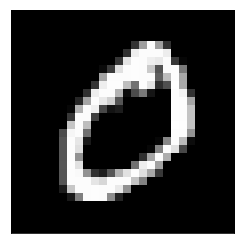

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
np.set_printoptions(linewidth=200)

# Only get the images of digits 0-3
x3 = x[np.array(y.astype(int)) <= 3]
y3 = y[np.array(y.astype(int)) <= 3]

plt.matshow(x3[0].reshape(28, 28), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks

# Split the features and target into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y)

# Create and train the MLP Neural Network model
MLPNeuralNetworkModel = MLPClassifier(solver='sgd', alpha=0.0001, max_iter=200, hidden_layer_sizes=(6,), random_state=2)
MLPNeuralNetworkModel.fit(x3, y3)


2
(6, 4)


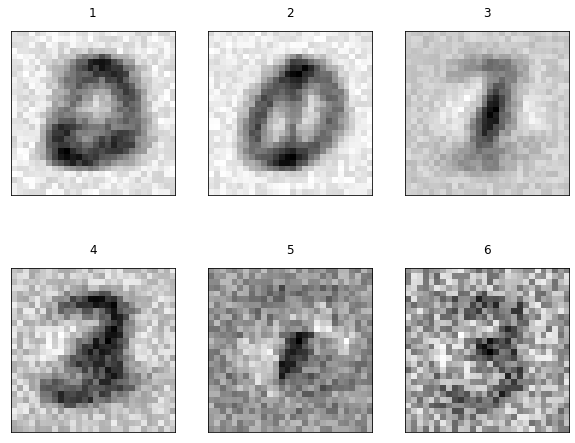

In [68]:
# The mlp neural network classifer stores the coefficients of the hidden layers and output layer in the coefs_ attribute/variable
print(len(MLPNeuralNetworkModel.coefs_))
print(MLPNeuralNetworkModel.coefs_[1].shape)

# Visualize the weights of the hidden layer to get some insights into what each node is doing
fig, axes = plt.subplots(2, 3, figsize=(10,8))
for i, ax in enumerate(axes.ravel()):
    coef = MLPNeuralNetworkModel.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i+1)
plt.show()